In [1]:
import utils
import qiskit
import qiskit_aer
import numpy as np
import qiskit.visualization

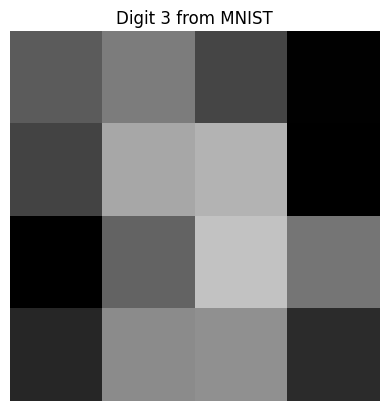

In [2]:
image = utils.plot_image('../images/three_4by4.jpg', 'Digit 3 from MNIST')

In [3]:
def build_qubit_lattice(image):
    flat_ang_representation = utils.get_angle_representation(image, 
                                                         min_val=0, 
                                                         max_val=255)
    n_pixels = len(flat_ang_representation)
    quantumPixelReg = qiskit.QuantumRegister(n_pixels, 'Quantum Pixel')
    classicalPixelReg = qiskit.ClassicalRegister(n_pixels, 'Classical Pixel')
    qubit_lattice = qiskit.QuantumCircuit(quantumPixelReg, classicalPixelReg)

    for idx, angle in enumerate(flat_ang_representation):
        qubit_lattice.ry(angle, idx)
        qubit_lattice.measure(idx, idx)
        
    return qubit_lattice

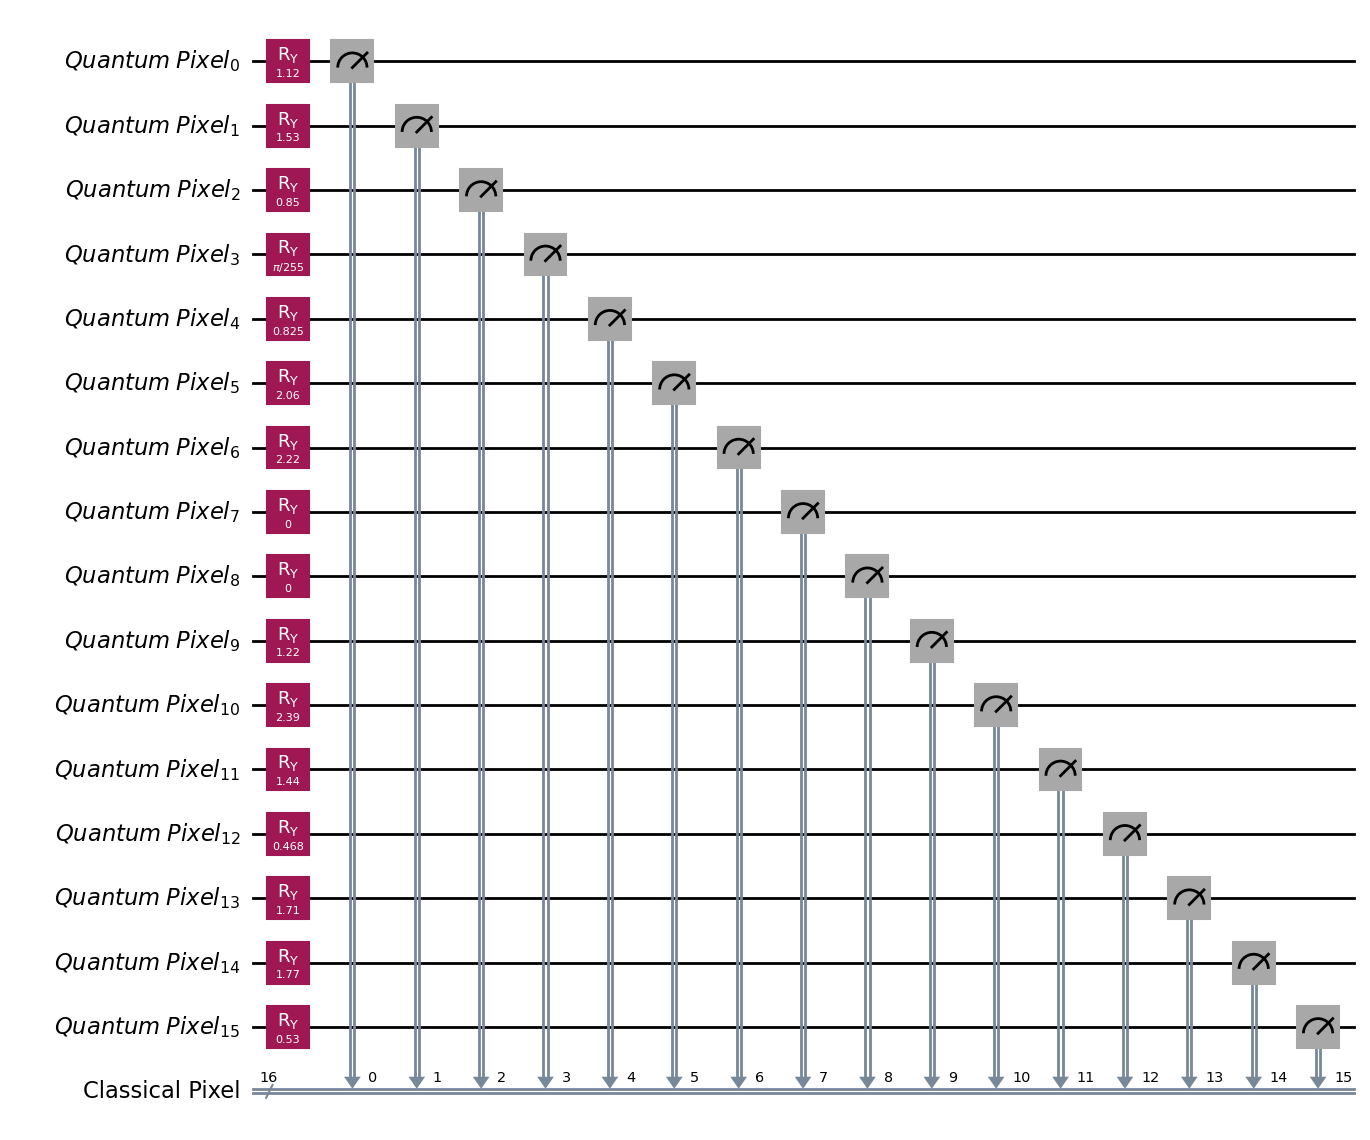

In [4]:
qubit_lattice = build_qubit_lattice(image)
qubit_lattice.draw(output="mpl")

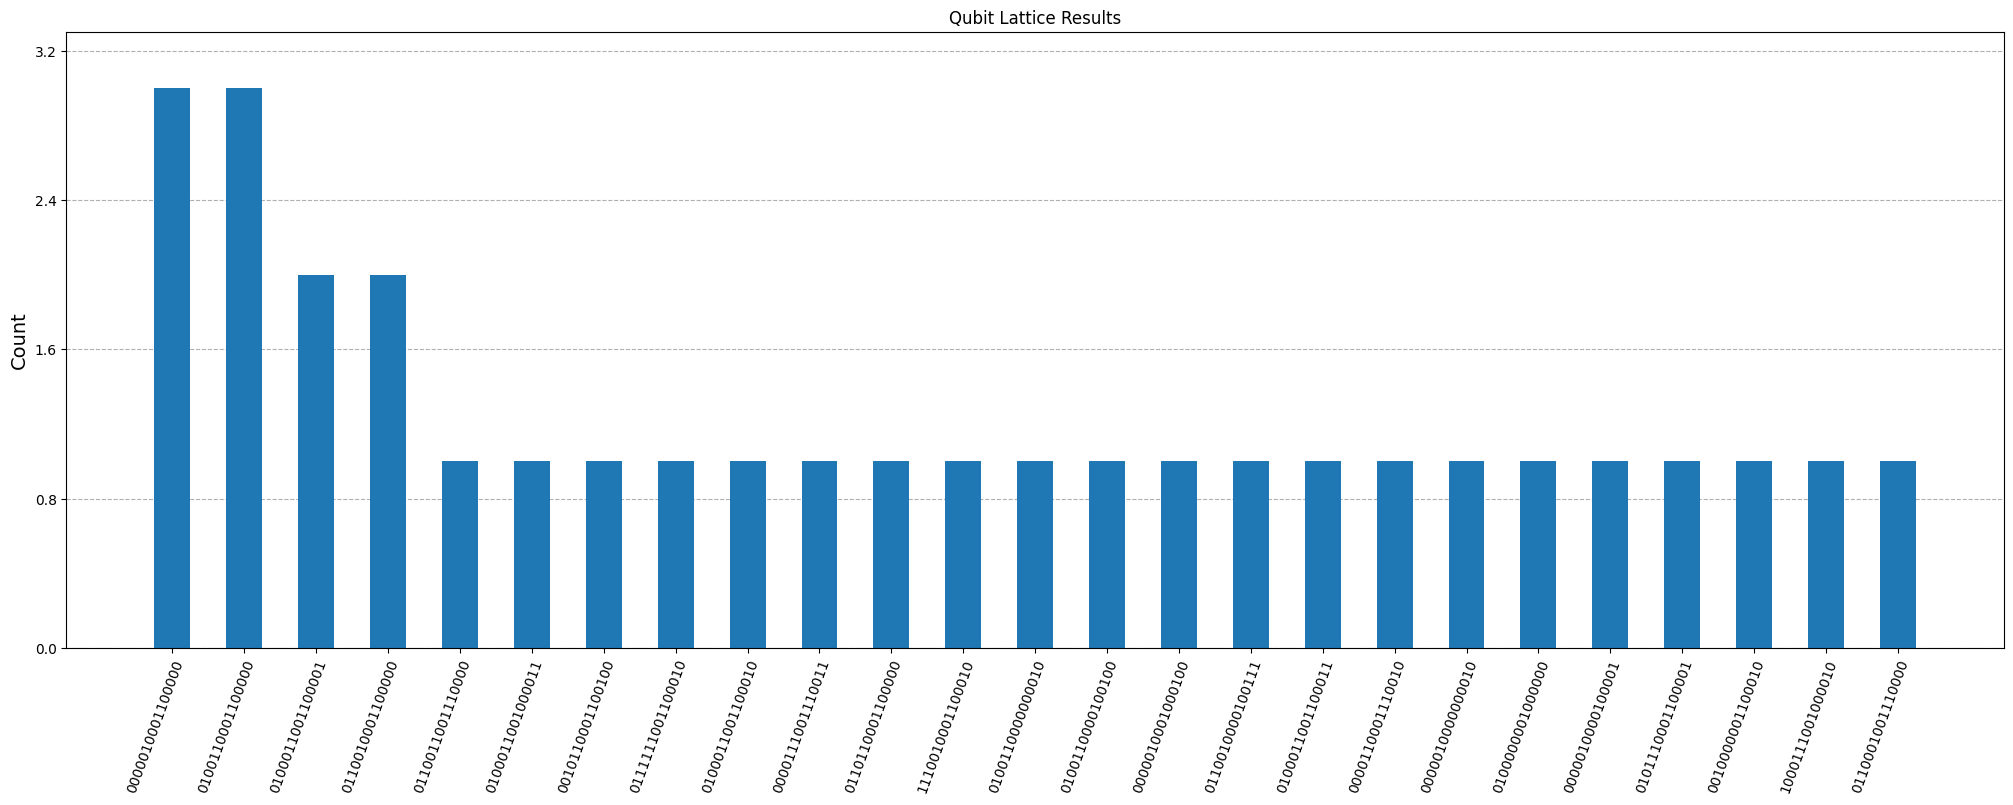

In [5]:
simulator = qiskit_aer.AerSimulator()
circuit = qiskit.transpile(qubit_lattice, simulator)
shots = 100
result = simulator.run(circuit, shots=shots).result()
counts = result.get_counts(circuit)
qiskit.visualization.plot_histogram(counts, figsize=(25, 8), sort="value_desc", title="Qubit Lattice Results", bar_labels=False, number_to_keep=25)

In [6]:
# To reconstruct the image we collect the results from all shots
values = np.zeros(qubit_lattice.num_qubits)
for item in counts:
    for i, bit in enumerate(item):
        if bit=='0':
            values[i]+=counts[item]

values = values/shots

reconstruct = []
for pixel in values:
    color = 2*np.arccos((pixel)**(1/2)) # "shots" corresponds to the total counts value.
    reconstruct.append(color)

    
reconstruct = list(np.interp(reconstruct, (0, np.pi), (0, 255)).astype(int))
reconstruct = np.fliplr(np.flipud(np.reshape(reconstruct, (4,4))))

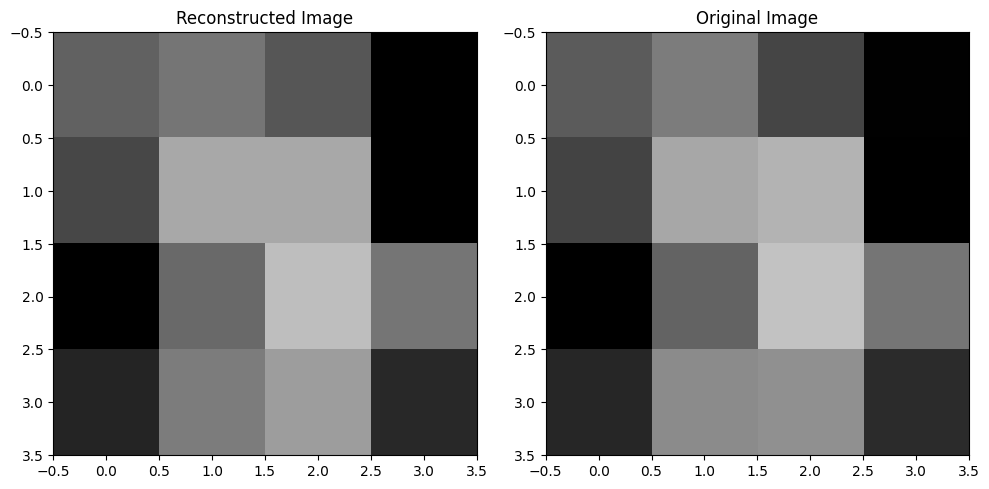

In [7]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(reconstruct, cmap='gray', vmin=0, vmax=255)
axs[0].set_title('Reconstructed Image')
axs[1].imshow(image, cmap='gray', vmin=0, vmax=255)
axs[1].set_title('Original Image')

plt.tight_layout()